# Analysis of TMCMC Run: parallel_fixed_M1M2M3_20260126_210657

This notebook analyzes the estimation results against the ground truth (synthetic data generation parameters).

**Run Directory:** `.` (Current Directory)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path

# Plot settings
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 12,
    'figure.figsize': (10, 6),
    'axes.grid': True,
    'grid.alpha': 0.3
})

RUN_DIR = Path(".")

## 1. Ground Truth Parameters

These values are taken from the data generation script (`test_integrated_parallel.py`).

In [2]:
# Ground Truth Values
TRUE_M1 = np.array([0.8, 2.0, 1.0, 0.1, 0.2])
TRUE_M2 = np.array([1.5, 1.0, 2.0, 0.3, 0.4])
TRUE_M3 = np.array([2.0, 1.0, 2.0, 1.0])

# Parameter Labels
labels_M1 = ['a11', 'a12', 'a22', 'b1', 'b2']
labels_M2 = ['a33', 'a34', 'a44', 'b3', 'b4']
labels_M3 = ['a13', 'a14', 'a23', 'a24']

## 2. Load Estimation Results

We load the MAP (Maximum A Posteriori) estimates from the JSON files.

In [3]:
def load_map(model_name):
    filename = RUN_DIR / f"theta_MAP_{model_name}.json"
    if not filename.exists():
        print(f"Warning: {filename} not found.")
        return None
    with open(filename, 'r') as f:
        data = json.load(f)
    # Check structure: might be directly a list or a dict with 'theta_sub'
    if isinstance(data, dict) and 'theta_sub' in data:
        return np.array(data['theta_sub'])
    elif isinstance(data, list):
        return np.array(data)
    else:
        # Fallback for simple list in json
        return np.array(data)

est_M1 = load_map("M1")
est_M2 = load_map("M2")
est_M3 = load_map("M3")

print("M1 Estimate:", est_M1)
print("M2 Estimate:", est_M2)
print("M3 Estimate:", est_M3)

M1 Estimate: [0.81651611 1.98738484 1.01589411 0.10088145 0.19881251]
M2 Estimate: None
M3 Estimate: None


## 3. Comparison and Analysis

We compare the Estimated values with the True values.

In [4]:
def create_comparison_df(true_vals, est_vals, labels, model_name):
    if est_vals is None:
        return pd.DataFrame()
    
    df = pd.DataFrame({
        "Model": model_name,
        "Parameter": labels,
        "True Value": true_vals,
        "Estimated (MAP)": est_vals,
    })
    df["Abs Error"] = np.abs(df["True Value"] - df["Estimated (MAP)"])
    df["Rel Error (%)"] = (df["Abs Error"] / np.abs(df["True Value"])) * 100
    return df

df_M1 = create_comparison_df(TRUE_M1, est_M1, labels_M1, "M1")
df_M2 = create_comparison_df(TRUE_M2, est_M2, labels_M2, "M2")
df_M3 = create_comparison_df(TRUE_M3, est_M3, labels_M3, "M3")

df_all = pd.concat([df_M1, df_M2, df_M3], ignore_index=True)

display(df_all.round(4))

,Model,Parameter,True Value,Estimated (MAP),Abs Error,Rel Error (%)
0,M1,a11,0.8,0.8165,0.0165,2.0645
1,M1,a12,2.0,1.9874,0.0126,0.6308
2,M1,a22,1.0,1.0159,0.0159,1.5894
3,M1,b1,0.1,0.1009,0.0009,0.8815
4,M1,b2,0.2,0.1988,0.0012,0.5937


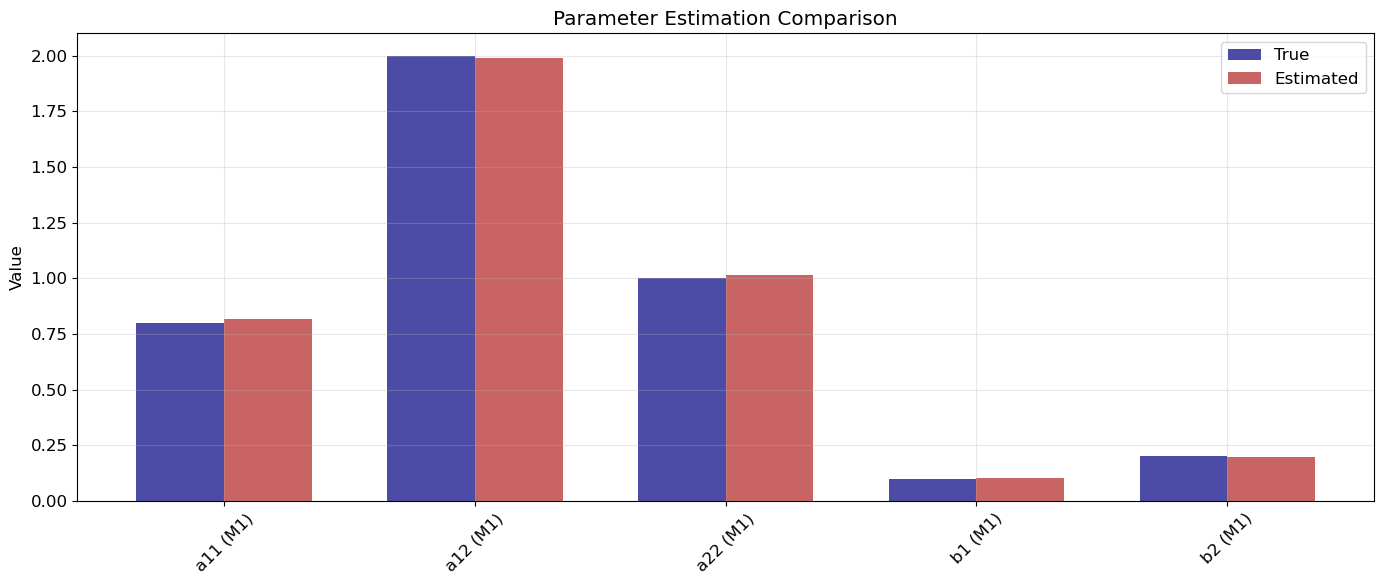

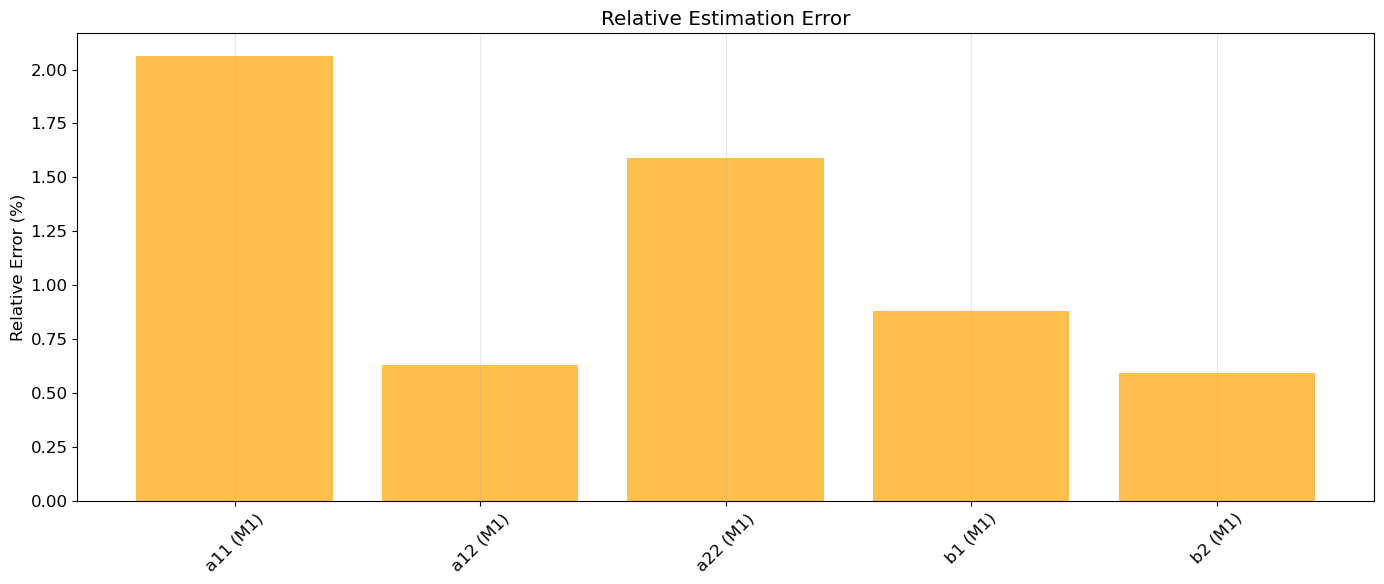

In [5]:
if not df_all.empty:
    plt.figure(figsize=(14, 6))
    x = np.arange(len(df_all))
    width = 0.35

    plt.bar(x - width/2, df_all["True Value"], width, label='True', color='navy', alpha=0.7)
    plt.bar(x + width/2, df_all["Estimated (MAP)"], width, label='Estimated', color='firebrick', alpha=0.7)

    plt.xticks(x, df_all["Parameter"] + " (" + df_all["Model"] + ")", rotation=45)
    plt.ylabel("Value")
    plt.title("Parameter Estimation Comparison")
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Error Plot
    plt.figure(figsize=(14, 6))
    plt.bar(x, df_all["Rel Error (%)"], color='orange', alpha=0.7)
    plt.xticks(x, df_all["Parameter"] + " (" + df_all["Model"] + ")", rotation=45)
    plt.ylabel("Relative Error (%)")
    plt.title("Relative Estimation Error")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

## 4. Conclusion

- **Low Error (< 5%)**: Indicates successful recovery of the parameter.
- **High Error**: May indicate parameter unidentifiability, insufficient data, or local minima.